<a href="https://colab.research.google.com/github/sudeepmenon17/PytorchforNN/blob/main/NN_for_separated_flows_over_airfoils.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
!pip install google-auth


In [89]:
from google.colab import auth
from google.colab import drive

In [90]:
auth.authenticate_user()

In [91]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [92]:
!ls /content/drive/MyDrive/Data_from_Karim/AirfoilS809/


data_set1.csv  data_set2.csv  data_set3.csv  data_set4.csv  neuralNetwork_reg.py  ReadMe.docx


In [93]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline


In [94]:
# Read the data set - data_set3.csv --> Airfoil S809, Re = 2e6, alpha = 14.2 deg
df = pd.read_csv("/content/drive/MyDrive/Data_from_Karim/AirfoilS809/data_set3.csv")
df.head()


,x,y,beta,feature1,feature2,feature3,feature4,feature5
0,0.997919,0.000257,1.0,0.025984,4.740000e-07,0.923826,0.000329,0.000027
1,0.997809,0.000272,1.0,0.038271,3.490000e-07,1.001367,0.000212,0.000036
2,0.997977,0.000226,1.0,0.110119,7.410000e-07,1.003305,0.000105,0.000559
3,0.997921,0.000260,1.0,0.238758,1.300000e-05,0.812515,0.002879,0.000191
4,0.997695,0.000287,1.0,0.011320,2.930000e-07,0.997945,0.000782,0.000002


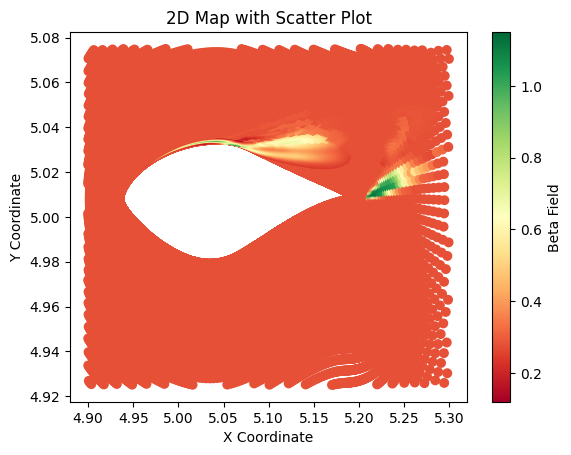

In [95]:


# Visualize beta field for Airfoil S809, Re = 2e6, alpha = 14.2deg

xc = np.array(df['x'])
yc = np.array(df['y'])
b = np.array(df['beta'])

# Normalize x and y coordinates
min_range = -5.0
max_range = 5.0
xc = (xc - np.min(xc)) * (max_range - min_range) / (np.max(xc) - np.min(xc))
yc = (yc - np.min(yc)) * (max_range - min_range) / (np.max(yc) - np.min(yc))

# Normalize beta field
bmin = 0.12
bmax = 1.15
b = bmin +  (b - np.min(b)) * (bmax- bmin) / (np.max(b) - np.min(b))

nx = []
ny = []
nb = []
# Filter data for the specified range of coordinates
for i in range(len(xc)):
  if xc[i]>=4.9 and xc[i]<=5.3:
    if yc[i]>=4.925 and yc[i]<=5.075:
      nx.append(xc[i])
      ny.append(yc[i])
      nb.append(b[i])

# # Create a 2D heatmap
# plt.hexbin(nx, ny, C=nb, gridsize=5000, cmap=plt.cm.YlOrRd_r)
# plt.colorbar(label='Field Value')
# plt.xlabel('X Coordinate')
# plt.ylabel('Y Coordinate')
# plt.title('Field Visualization')
# plt.show()


# Create a scatter plot
plt.scatter(nx, ny, c=nb,  cmap= 'RdYlGn',alpha=1, marker='.',s=150)
plt.colorbar(label='Beta Field')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('2D Map with Scatter Plot')
plt.show()

# X, Y = np.meshgrid(nx, ny)

# # Create a contour plot
# plt.figure()
# contour = plt.contour(X, Y, nb, cmap='viridis')
# plt.colorbar(contour, label='Data Value')
# plt.xlabel('X Coordinate')
# plt.ylabel('Y Coordinate')
# plt.title('Contour Plot')
# plt.show()

In [96]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Preprocess Features
df = df.drop(['x','y','beta'],axis=1)

# Fill missing values with the mean
df = df.fillna(df.mean())


# Standardization
standard_scaler = StandardScaler()
df_standardized = standard_scaler.fit_transform(df)